In [2]:
# https://youtu.be/UPKugq0fK04 참고
# https://machinelearningforbeginners.wordpress.com/2017/11/23/id3-algorithm-implementation-in-python/
import pandas as pd
import collections
import math
import seaborn as sns
import numpy as np
train = pd.read_csv('data/gender_classification.csv')

In [4]:
train.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


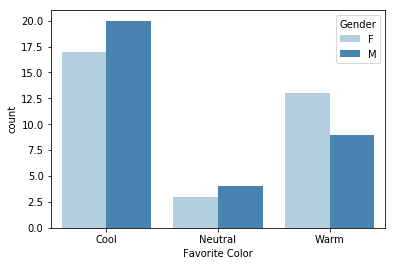

In [33]:
sns.countplot('Favorite Color', hue='Gender', data=train, palette='Blues')

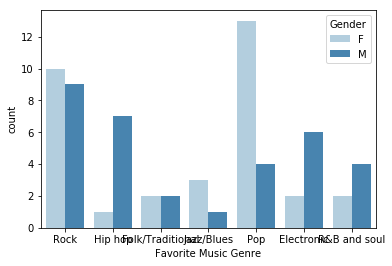

In [34]:
sns.countplot('Favorite Music Genre', hue='Gender', data=train, palette='Blues')

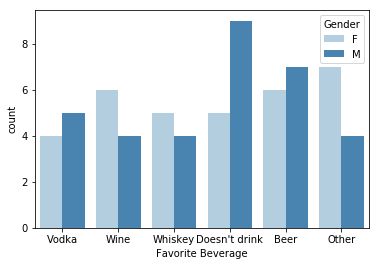

In [35]:
sns.countplot('Favorite Beverage', hue='Gender', data=train, palette='Blues')

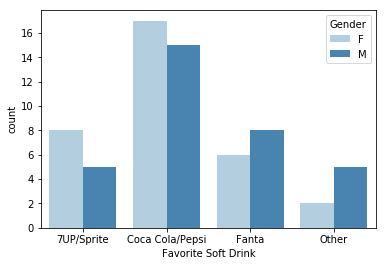

In [36]:
sns.countplot('Favorite Soft Drink', hue='Gender', data=train, palette='Blues')

In [37]:
collections.Counter(train.values[:, -1])

Counter({'F': 33, 'M': 33})

In [65]:
# 의사결정트리 ID3 알고리즘 사용
# entropy 계산
entropy = - (33/66) * math.log(33/66, 2) - (33/66) * math.log(33/66, 2)
print(entropy)

1.0


In [129]:
train.values

array([['Cool', 'Rock', 'Vodka', '7UP/Sprite', 'F'],
       ['Neutral', 'Hip hop', 'Vodka', 'Coca Cola/Pepsi', 'F'],
       ['Warm', 'Rock', 'Wine', 'Coca Cola/Pepsi', 'F'],
       ['Warm', 'Folk/Traditional', 'Whiskey', 'Fanta', 'F'],
       ['Cool', 'Rock', 'Vodka', 'Coca Cola/Pepsi', 'F'],
       ['Warm', 'Jazz/Blues', "Doesn't drink", 'Fanta', 'F'],
       ['Cool', 'Pop', 'Beer', 'Coca Cola/Pepsi', 'F'],
       ['Warm', 'Pop', 'Whiskey', 'Fanta', 'F'],
       ['Warm', 'Rock', 'Other', '7UP/Sprite', 'F'],
       ['Neutral', 'Pop', 'Wine', 'Coca Cola/Pepsi', 'F'],
       ['Cool', 'Pop', 'Other', '7UP/Sprite', 'F'],
       ['Warm', 'Pop', 'Other', '7UP/Sprite', 'F'],
       ['Warm', 'Pop', 'Wine', '7UP/Sprite', 'F'],
       ['Warm', 'Electronic', 'Wine', 'Coca Cola/Pepsi', 'F'],
       ['Cool', 'Rock', 'Beer', 'Coca Cola/Pepsi', 'F'],
       ['Warm', 'Jazz/Blues', 'Wine', 'Coca Cola/Pepsi', 'F'],
       ['Cool', 'Pop', 'Wine', '7UP/Sprite', 'F'],
       ['Cool', 'Rock', 'Other', 'Coca

In [ ]:
# Information Gain 계산
# 주어진 상황의 엔트로피 - 하나의 속성을 잡았을 때의 엔트로피

In [204]:
#Entropy Calculation method
def calc_entropy(data):
    #Calculate the length of the data-set
    entries = len(data) 
    labels = {}
    #Read the class labels from the data-set file into the dict object "labels"
    y_data = np.array(data)[:, -1]
    for rec in y_data:
        label = rec[-1]
        if label not in labels.keys():
            labels[label] = 0
        labels[label] += 1
    #entropy variable is initialized to zero
    # print(labels)
    entropy = 0.0
    #For every class label (x) calculate the probability p(x)
    for key in labels:
        prob = float(labels[key])/entries
        #Entropy formula calculation
        entropy -= prob * math.log(prob,2) 
    #print "Entropy -- ",entropy
    #Return the entropy of the data-set
    return entropy

In [223]:
#Function to determine the best attribute for the split criteria
def attribute_selection(data):
    #get the number of features available in the given data-set
    features = len(data[0]) - 1
    #Fun call to calculate the base entropy (entropy of the entire data-set)
    baseEntropy = calc_entropy(data)
    #initialize the info-gain variable to zero
    max_InfoGain = 0.0;
    bestAttr = -1
    #iterate through the features identified
    for i in range(features):
        #store the values of the features in a variable
        AttrList = [rec[i] for rec in data]
        #get the unique values from the feature values
        uniqueVals = set(AttrList)
        #initializing the entropy and the attribute entropy to zero
        newEntropy = 0.0
        attrEntropy = 0.0 
        #iterate through the list of unique values and perform split
        for value in uniqueVals:
         #function call to split the data-set
            newData = dataset_split(data, i, value) 
            #probability calculation
            prob = len(newData)/float(len(data)) 
            #entropy calculation for the attributes
            newEntropy = prob * calc_entropy(newData) 
            attrEntropy += newEntropy 
        #calculation of Information Gain
        infoGain = baseEntropy - attrEntropy 
#         print('infoGain', infoGain)
#         print('max_InfoGain', max_InfoGain)
#         print('bestAttr', bestAttr)
        #identify the attribute with max info-gain
        if (infoGain > max_InfoGain):
            max_InfoGain = infoGain
            bestAttr = i 
    #return the attribute identified
    return bestAttr

In [224]:
#Function to split the data-set based on the attribute that has maximum information gain
#input values: data-set, attribute index and attribute-value
def dataset_split(data, arc, val):
    #declare a list variable to store the newly split data-set
    newData = []
    #iterate through every record in the data-set and split the data-set
    for rec in data: 
        if rec[arc] == val:
            reducedSet = list(rec[:arc]) 
            reducedSet.extend(rec[arc+1:])
            newData.append(reducedSet)
    #return the new list that has the data-set that is split on the selected attribute
    return newData

In [225]:
attribute_selection(train.values)

1

In [226]:
#Function to build the decision tree
def decision_tree(data, labels):
    #list variable to store the class-labels (terminal nodes of decision tree)
    classList = [rec[-1] for rec in data]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    #functional call to identify the attribute for split
    maxGainNode = attribute_selection(data)
    #variable to store the class label value
    treeLabel = labels[maxGainNode] 
    #dict object to represent the nodes in the decision tree
    theTree = {treeLabel:{}}
    del(labels[maxGainNode])
    #get the unique values of the attribute identified
    nodeValues = [rec[maxGainNode] for rec in data]
    uniqueVals = set(nodeValues)
    for value in uniqueVals:
        subLabels = labels[:]
        #update the non-terminal node values of the decision tree
        theTree[treeLabel][value] = decision_tree(dataset_split(data, maxGainNode, value),subLabels) 
    #return the decision tree (dict object)
    return theTree

In [230]:
decision_tree(train.values, ['Favorite Color', 'Favorite Music Genre', 'Favorite Beverage', 'Favorite Soft Drink', 'Gender'])

{'Favorite Music Genre': {'Electronic': {'Favorite Beverage': {'Beer': 'M',
    "Doesn't drink": {'Gender': {'F': 'F', 'M': 'M'}},
    'Other': 'M',
    'Vodka': 'M',
    'Whiskey': 'M',
    'Wine': 'F'}},
  'Folk/Traditional': {'Favorite Beverage': {'Beer': 'M',
    'Other': 'M',
    'Whiskey': 'F'}},
  'Hip hop': {'Favorite Beverage': {'Beer': 'M',
    "Doesn't drink": 'M',
    'Vodka': 'F',
    'Wine': 'M'}},
  'Jazz/Blues': {'Favorite Beverage': {"Doesn't drink": 'F',
    'Vodka': 'M',
    'Whiskey': 'F',
    'Wine': 'F'}},
  'Pop': {'Favorite Beverage': {'Beer': 'F',
    "Doesn't drink": {'Favorite Color': {'Cool': 'F', 'Neutral': 'M'}},
    'Other': {'Favorite Soft Drink': {'7UP/Sprite': 'F',
      'Coca Cola/Pepsi': 'F',
      'Fanta': 'M'}},
    'Whiskey': {'Favorite Color': {'Cool': 'M', 'Warm': 'F'}},
    'Wine': 'F'}},
  'R&B and soul': {'Favorite Beverage': {'Beer': 'F',
    "Doesn't drink": 'M',
    'Whiskey': {'Favorite Color': {'Cool': 'M', 'Warm': 'F'}},
    'Wine': 'M'

In [234]:
train['Gender'].value_counts()
gender_mapping = {"F": 0, "M": 1}
for dataset in [train]:
    dataset['gender'] = dataset['Gender'].map(gender_mapping)

In [235]:
features_drop = ['Gender']
train = train.drop(features_drop, axis=1)

In [6]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(train,'gender')

ValueError: could not convert string to float: 'M'

In [7]:
import sklearn.datasets as datasets
import pandas as pd
iris=datasets.load_iris()
df=pd.DataFrame(iris.data, columns=iris.feature_names)
y=iris.target

In [8]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(df,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [10]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

ImportError: No module named 'pydotplus'